In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/so2_20180101_20231031 (1).csv')
data

,TimeStamp,3207010,33204020,29209010,33202110,14104030,8344010,43202020,34202020,28209010,...,23211040,12201160,11222020,15201150,27201030,20202050,5203020,34207090,27210010,44214010
0,2018-01-01 00:00:00,0.000,0.005,0.003,0.003,0.002,0.0,0.000,0.001,0.001,...,0.000,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
1,2018-01-01 01:00:00,0.000,0.005,0.003,0.003,0.002,0.0,0.000,0.001,0.001,...,0.000,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
2,2018-01-01 02:00:00,0.000,0.005,0.003,0.003,0.005,0.0,0.000,0.001,0.001,...,0.000,0.000,0.000,0.001,0.004,0.003,0.000,0.001,0.0,0.003
3,2018-01-01 03:00:00,0.000,0.007,0.002,0.004,0.005,0.0,0.000,0.001,0.001,...,0.000,0.000,0.000,0.001,0.004,0.003,0.001,0.001,0.0,0.003
4,2018-01-01 04:00:00,0.000,0.004,0.002,0.003,0.004,0.0,0.001,0.001,0.001,...,0.000,0.000,0.000,0.000,0.004,0.003,0.001,0.001,0.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,2023-10-31 19:00:00,0.001,0.001,0.001,0.006,0.003,0.0,0.001,0.001,0.001,...,0.001,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51116,2023-10-31 20:00:00,0.000,0.001,0.000,0.004,0.003,0.0,0.000,0.000,0.000,...,0.001,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51117,2023-10-31 21:00:00,0.000,0.001,0.000,0.004,0.003,0.0,0.000,0.001,0.001,...,0.000,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51118,2023-10-31 22:00:00,0.001,0.001,0.000,0.003,0.004,0.0,0.000,0.001,0.001,...,0.000,0.001,0.001,0.000,NaN,0.000,0.000,0.000,NaN,0.002


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
sel_col='33204020'

In [ ]:
train_data, test_data = train_test_split(data[sel_col], test_size=0.2, shuffle=False)

In [ ]:
def create_dataset(dataset,time_steps=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_steps-1):
    a=dataset[i:(i+time_steps)]
    dataX.append(a)
    dataY.append(dataset[i+time_steps])
  return np.array(dataX,dtype=float),np.array(dataY,dtype=float)

In [ ]:
time_steps=10
scaler=MinMaxScaler()
train_data=scaler.fit_transform(train_data.values.reshape(-1,1))
test_data=scaler.transform(test_data.values.reshape(-1,1))
X_train,y_train=create_dataset(train_data,time_steps)
X_test,y_test=create_dataset(test_data,time_steps)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
model=Sequential()
model.add(Bidirectional(LSTM(100,return_sequences=True,input_shape=(X_train.shape[1],1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=2)

Epoch 1/10
1278/1278 - 73s - loss: 0.0020 - 73s/epoch - 57ms/step
Epoch 2/10
1278/1278 - 60s - loss: 0.0017 - 60s/epoch - 47ms/step
Epoch 3/10
1278/1278 - 63s - loss: 0.0017 - 63s/epoch - 49ms/step
Epoch 4/10
1278/1278 - 60s - loss: 0.0017 - 60s/epoch - 47ms/step
Epoch 5/10
1278/1278 - 60s - loss: 0.0017 - 60s/epoch - 47ms/step
Epoch 6/10
1278/1278 - 62s - loss: 0.0017 - 62s/epoch - 49ms/step
Epoch 7/10
1278/1278 - 63s - loss: 0.0017 - 63s/epoch - 49ms/step
Epoch 8/10
1278/1278 - 61s - loss: 0.0017 - 61s/epoch - 48ms/step
Epoch 9/10
1278/1278 - 64s - loss: 0.0017 - 64s/epoch - 50ms/step
Epoch 10/10
1278/1278 - 61s - loss: 0.0017 - 61s/epoch - 47ms/step


In [ ]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

320/320 [==============================] - 9s 20ms/step


In [ ]:
rsme=sqrt(mean_squared_error(y_test,predictions))
print(f"Root mean square error:{rsme}")

Root mean square error:0.001690459598174867


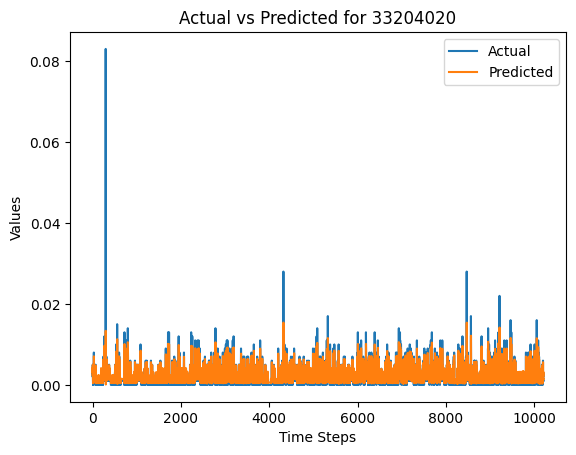

In [ ]:
# Plot the results
plt.plot(y_test, label="Actual")
plt.plot(predictions, label="Predicted")
plt.legend()
plt.title(f'Actual vs Predicted for {sel_col}')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.show()
